In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **EDA**

In [2]:
df = pd.read_csv('water_potability.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Jumlah data per kelas : 
 0    1998
1    1278
Name: Potability, dtype: int64


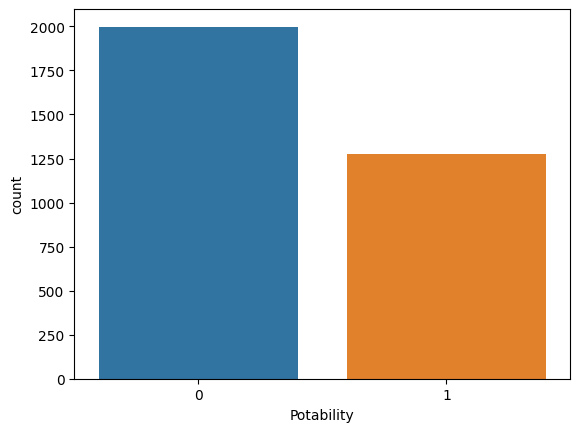

In [4]:
sns.countplot(x=df['Potability'])
jumlah_perkelas = df['Potability'].value_counts()

print('Jumlah data per kelas : \n', jumlah_perkelas)

In [5]:
print('Jumlah data kosong di setiap column :')
df.isnull().sum()

Jumlah data kosong di setiap column :


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Kolom yang memiliki data kosong adalah kolom : **ph**, **Sulfate**, dan **Trihalomethanes**

In [6]:
df1=df[df['Potability']==1].copy()
df2=df[df['Potability']==0].copy()

In [8]:
#replace null value dengan mean dari kelas 1
df1['ph']=df1['ph'].replace(np.nan, df1['ph'].mean())
df1['Sulfate']=df1['Sulfate'].replace(np.nan, df1['Sulfate'].mean())
df1['Trihalomethanes']=df1['Trihalomethanes'].replace(np.nan, df1['Trihalomethanes'].median())

#replace null value dengan mean dari kelas 0
df2['ph']=df2['ph'].replace(np.nan, df2['ph'].mean())
df2['Sulfate']=df2['Sulfate'].replace(np.nan, df2['Sulfate'].mean())
df2['Trihalomethanes']=df2['Trihalomethanes'].replace(np.nan, df2['Trihalomethanes'].median())

#Satukan kembali dalam satu dataframe
df=pd.concat([df1,df2], axis=0)

In [9]:
df = df.sort_index(ascending=True)

In [10]:
print('Jumlah data kosong di setiap column :')
df.isnull().sum()

Jumlah data kosong di setiap column :


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Describe Data

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.405792,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769943,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.542198,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


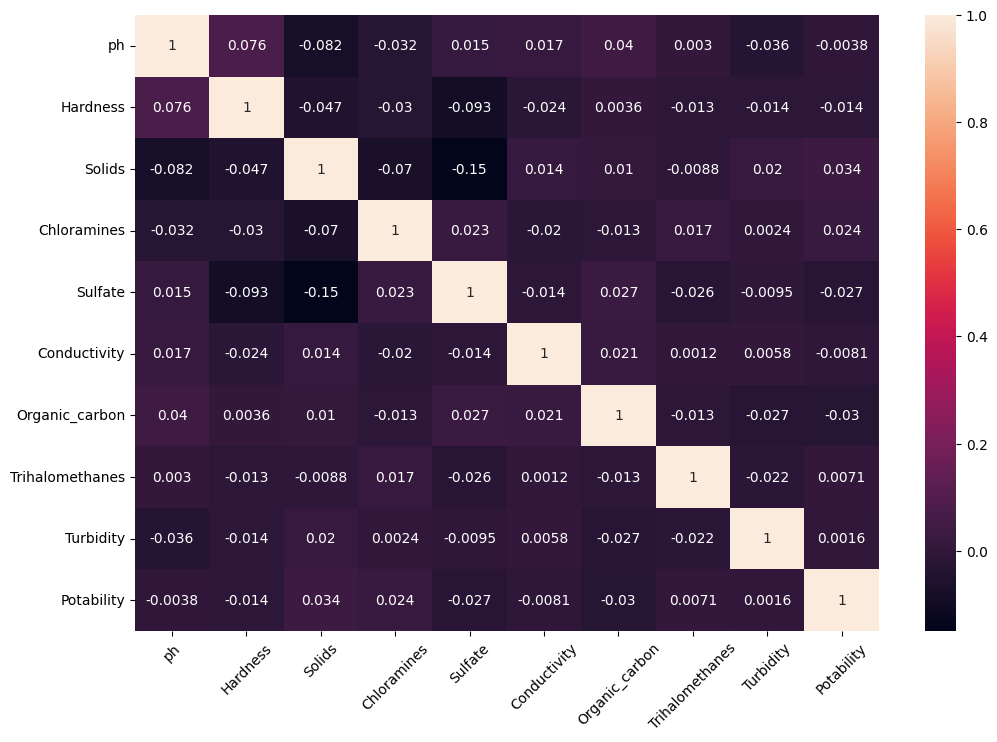

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

In [13]:
abs(df.corr()['Potability']).sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Sulfate            0.026957
Chloramines        0.023779
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007094
ph                 0.003848
Turbidity          0.001581
Name: Potability, dtype: float64

In [15]:
normalized = df.iloc[:, 0:-1]
normalized

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.678214,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658


In [16]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler = MinMaxScaler()

normalized = MinMaxscaler.fit_transform(normalized)

In [17]:
normalized = pd.DataFrame(data=normalized, columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'])
normalized['Potability'] = df['Potability']

# **Spliting**

In [18]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
data = normalized.drop(['Potability'], axis=1)

data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.506098,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.583939,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.583939,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.578265,0.368912,0.678284,0.534960,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.578265,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.578265,0.387157,0.343638,0.622659,0.616120


In [20]:
y = normalized['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data,y, train_size=0.8, random_state=24)

print('Jumlah X train :', len(X_train))
print('Jumlah Y train :', len(y_train))
print('Jumlah X test :', len(X_test))
print('Jumlah Y test :', len(y_test))

Jumlah X train : 2620
Jumlah Y train : 2620
Jumlah X test : 656
Jumlah Y test : 656


In [22]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1514,0.429996,0.338914,0.334046,0.512840,0.578265,0.432295,0.237480,0.539931,0.245231
96,0.505562,0.628377,0.386700,0.456348,0.605025,0.265043,0.324207,0.726581,0.626680
1962,0.452549,0.423075,0.431375,0.550235,0.594918,0.744272,0.487707,0.911156,0.591579
1968,0.539560,0.597886,0.229836,0.425911,0.664296,0.470487,0.612126,0.534960,0.552952
970,0.506098,0.544589,0.281063,0.459843,0.583939,0.392634,0.555183,0.553545,0.379716
...,...,...,...,...,...,...,...,...,...
2193,0.506098,0.534245,0.295916,0.568285,0.583939,0.242844,0.388247,0.603405,0.579566
343,0.622630,0.386475,0.187395,0.530067,0.578265,0.464353,0.403680,0.317937,0.331845
2240,0.451646,0.653345,0.396383,0.462617,0.583939,0.382024,0.602017,0.571248,0.623828
899,0.577173,0.433309,0.292502,0.510024,0.583939,0.733491,0.540528,0.444972,0.495524


# SMOTE Resampling

BEFORE resampling:
0    1614
1    1006
Name: Potability, dtype: int64


<AxesSubplot: title={'center': 'Potability Before Balancing'}>

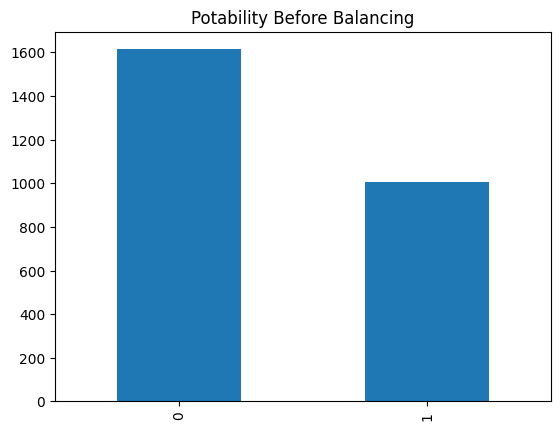

In [23]:
print('BEFORE resampling:')
print(y_train.value_counts())

y_train.value_counts().plot(kind='bar', title='Potability Before Balancing')

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
sm_xtrain, sm_ytrain = sm.fit_resample(X_train, y_train)

After SMOTE over-sampling:
Potability
0             1614
1             1614
dtype: int64


<AxesSubplot: title={'center': 'Potability After Balancing'}, xlabel='Potability'>

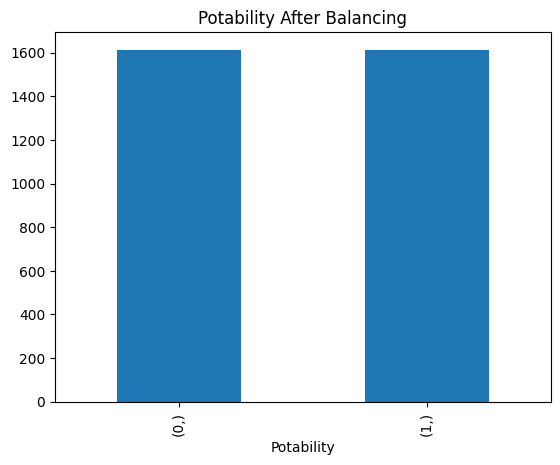

In [25]:
cek_sm_ytrain = pd.DataFrame(sm_ytrain, columns =['Potability'])
print('After SMOTE over-sampling:')
print(cek_sm_ytrain.value_counts())

cek_sm_ytrain.value_counts().plot(kind='bar', title='Potability After Balancing')

In [26]:
y_train_tree = tf.keras.utils.to_categorical(sm_ytrain, 2, dtype="float32")
y_test_tree = tf.keras.utils.to_categorical(y_test, 2, dtype="float32")

# Base Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
model1 = RandomForestClassifier(random_state=42)

model1.fit(sm_xtrain, y_train_tree)

RandomForestClassifier(random_state=42)

In [29]:
params1 = model1.get_params()
print('Parameter yang digunakan pada base Random Forest ini adalah:')
for key, value in params1.items():
    print(key, ':', value)

Parameter yang digunakan pada base Random Forest ini adalah:
bootstrap : True
ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : sqrt
max_leaf_nodes : None
max_samples : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
n_estimators : 100
n_jobs : None
oob_score : False
random_state : 42
verbose : 0
warm_start : False


In [30]:
predictions1 = model1.predict(X_test)

In [31]:
y_pred1 = np.around(predictions1, decimals=0).argmax(axis=1)
z = y_test_tree.argmax(axis=1)

print(classification_report(z, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       384
           1       0.77      0.79      0.78       272

    accuracy                           0.82       656
   macro avg       0.81      0.82      0.81       656
weighted avg       0.82      0.82      0.82       656



In [32]:
print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test_tree, predictions1)))

Accuracy score (validation): 0.810976


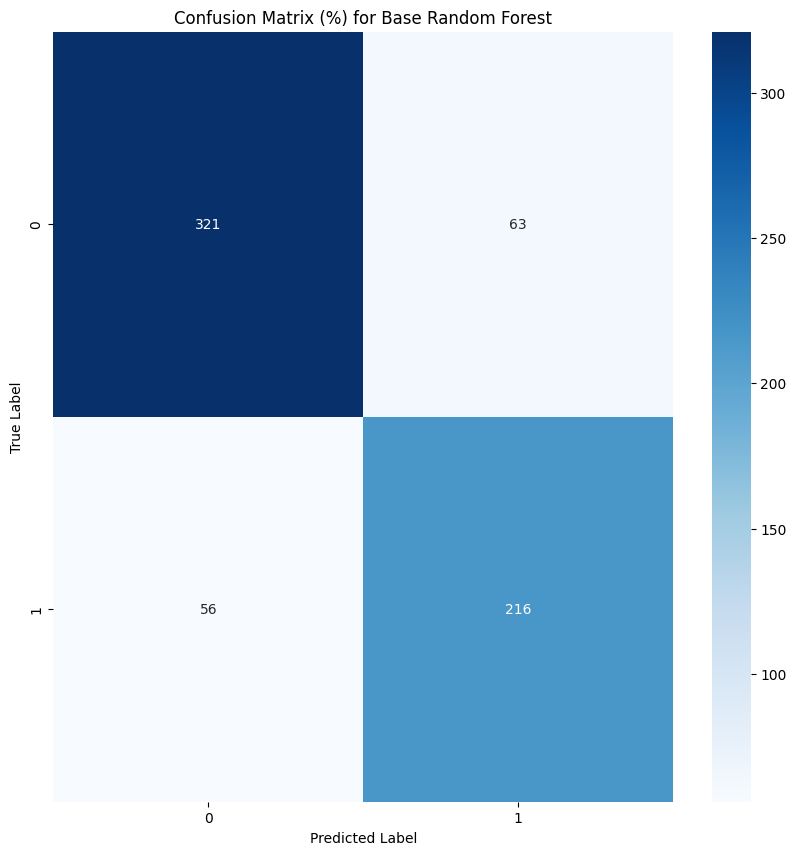

In [33]:
matrix1 = confusion_matrix(y_test_tree.argmax(axis=1), np.around(predictions1, decimals=0).argmax(axis=1))

#Plot
plt.figure(figsize = (10,10))
sns.heatmap(matrix1, annot=True, fmt='d', cmap='Blues', cbar=True,)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (%) for Base Random Forest')
plt.show()

# Tuning Random Forest - GridSearchCV

In [34]:
rf_tuning_params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators' : [50, 100, 150],
    'max_depth' : [5, 10, 15, 30],
    'min_samples_leaf' : [2, 3, 5],
    'max_features': [2, 'sqrt', 'log2']
}

In [35]:
model2 = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                      param_grid=rf_tuning_params, cv=5)
model2.fit(sm_xtrain, y_train_tree)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': [2, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [36]:
tuning_results_df = pd.DataFrame(model2.cv_results_)
tuning_results_df.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
190,0.715429,0.009148,0.020506,0.000399,entropy,30,2,2,100,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.789474,0.772446,0.801858,0.790698,0.675969,0.766089,0.046030,1
198,0.470193,0.008363,0.010910,0.000499,entropy,30,sqrt,2,50,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.775542,0.753870,0.811146,0.786047,0.662016,0.757724,0.051281,2
207,0.685438,0.087317,0.019056,0.004202,entropy,30,log2,2,50,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.775542,0.753870,0.811146,0.786047,0.662016,0.757724,0.051281,2
191,1.072256,0.015959,0.030117,0.000379,entropy,30,2,2,150,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.781734,0.764706,0.795666,0.786047,0.660465,0.757723,0.049651,4
82,0.386527,0.003150,0.020803,0.000400,gini,30,2,2,100,"{'criterion': 'gini', 'max_depth': 30, 'max_fe...",0.772446,0.766254,0.798762,0.773643,0.675969,0.757415,0.042215,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.607716,0.035655,0.025861,0.003291,entropy,5,2,3,150,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.678019,0.678019,0.695046,0.688372,0.282171,0.604325,0.161207,212
108,0.186512,0.000962,0.008800,0.000400,entropy,5,2,2,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.678019,0.653251,0.698142,0.697674,0.289922,0.603402,0.157598,213
111,0.185497,0.001264,0.008999,0.000001,entropy,5,2,3,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.676471,0.650155,0.691950,0.705426,0.288372,0.602475,0.158123,214
0,0.119700,0.002166,0.009046,0.000576,gini,5,2,2,50,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.682663,0.670279,0.710526,0.688372,0.257364,0.601841,0.172731,215


In [37]:
model2.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [38]:
params2 = model2.get_params()
print('Parameter yang digunakan pada GridSearchCV Random Forest ini adalah:')
for key, value in params2.items():
    print(key, ':', value)

Parameter yang digunakan pada GridSearchCV Random Forest ini adalah:
cv : 5
error_score : nan
estimator__bootstrap : True
estimator__ccp_alpha : 0.0
estimator__class_weight : None
estimator__criterion : gini
estimator__max_depth : None
estimator__max_features : sqrt
estimator__max_leaf_nodes : None
estimator__max_samples : None
estimator__min_impurity_decrease : 0.0
estimator__min_samples_leaf : 1
estimator__min_samples_split : 2
estimator__min_weight_fraction_leaf : 0.0
estimator__n_estimators : 100
estimator__n_jobs : None
estimator__oob_score : False
estimator__random_state : 42
estimator__verbose : 0
estimator__warm_start : False
estimator : RandomForestClassifier(random_state=42)
n_jobs : None
param_grid : {'criterion': ['gini', 'entropy'], 'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15, 30], 'min_samples_leaf': [2, 3, 5], 'max_features': [2, 'sqrt', 'log2']}
pre_dispatch : 2*n_jobs
refit : True
return_train_score : False
scoring : None
verbose : 0


In [39]:
predictions2 = model2.predict(X_test)

y_pred2 = np.around(predictions2, decimals=0).argmax(axis=1)
z = y_test_tree.argmax(axis=1)

print(classification_report(z, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       384
           1       0.76      0.74      0.75       272

    accuracy                           0.79       656
   macro avg       0.79      0.79      0.79       656
weighted avg       0.79      0.79      0.79       656



In [40]:
print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test_tree, predictions2)))

Accuracy score (validation): 0.794207


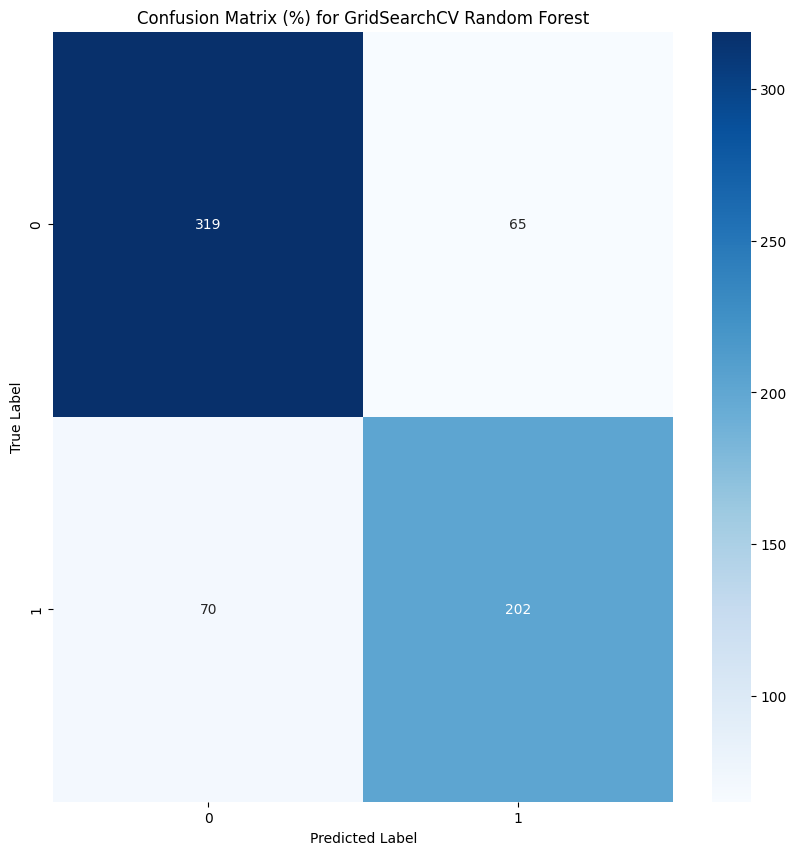

In [41]:
matrix2 = confusion_matrix(y_test_tree.argmax(axis=1), np.around(predictions2, decimals=0).argmax(axis=1))

#Plot
plt.figure(figsize = (10,10))
sns.heatmap(matrix2, annot=True, fmt='d', cmap='Blues', cbar=True,)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (%) for GridSearchCV Random Forest')
plt.show()

# Manual Tuning

In [42]:
criterions = ['gini', 'entropy']
estimators = [50, 100, 150]
max_depths = [5, 10, 15, 30]
min_samples_leafs = [2, 3, 5]
max_features = [2, 'sqrt', 'log2']

selected_criterion = []
selected_estimator = []
selected_max_depth = []
selected_min_samples_leaf = []
selected_max_features = []
accuracy = []

for crit in criterions:
    for est in estimators:
        for minS in min_samples_leafs:
            for depth in max_depths:
                for maxF in max_features:
                    # Train model
                    rf = RandomForestClassifier(criterion= crit, max_features= maxF, max_depth=depth, 
                                                min_samples_leaf=minS, n_estimators= est, random_state=42)
                    rf.fit(sm_xtrain, y_train_tree)
                    predictions = rf.predict(X_test)
                    acc_score = accuracy_score(y_test_tree, predictions)

                    # save to list for dataframe
                    selected_criterion.append(crit)
                    selected_estimator.append(est)
                    selected_max_depth.append(depth)
                    selected_min_samples_leaf.append(minS)
                    selected_max_features.append(maxF)
                    accuracy.append(acc_score)

In [43]:
# Create a DataFrame
results = pd.DataFrame({'Criterion': selected_criterion, 'Estimator': selected_estimator, 'Max_Depth': selected_max_depth, 'Min_Samples_Leaf': selected_min_samples_leaf, 'Max_Feature': selected_max_features, 'Accuracy_Score': accuracy})
results_sorted = results.sort_values(by='Accuracy_Score', ascending=False)
results_sorted

,Criterion,Estimator,Max_Depth,Min_Samples_Leaf,Max_Feature,Accuracy_Score
70,gini,100,30,5,sqrt,0.818598
71,gini,100,30,5,log2,0.818598
107,gini,150,30,5,log2,0.815549
106,gini,150,30,5,sqrt,0.815549
213,entropy,150,30,5,2,0.815549
...,...,...,...,...,...,...
13,gini,50,5,3,sqrt,0.754573
12,gini,50,5,3,2,0.754573
120,entropy,50,5,3,2,0.753049
108,entropy,50,5,2,2,0.751524


In [44]:
bestParams = results_sorted.iloc[0]
print('Hasil Pengujian dangan parameter terbaik pada Manual Tuning:\n\n',bestParams)

Hasil Pengujian dangan parameter terbaik pada Manual Tuning:

 Criterion               gini
Estimator                100
Max_Depth                 30
Min_Samples_Leaf           5
Max_Feature             sqrt
Accuracy_Score      0.818598
Name: 70, dtype: object


In [45]:
model3 = RandomForestClassifier(criterion= bestParams.Criterion,
                                n_estimators= bestParams.Estimator,
                                max_depth= bestParams.Max_Depth,
                                min_samples_leaf= bestParams.Min_Samples_Leaf,
                                max_features= bestParams.Max_Feature,
                                random_state=42)
model3 = model3.fit(sm_xtrain, y_train_tree)

In [46]:
params3 = model3.get_params()
print('Parameter yang digunakan pada Manual Tuning Random Forest ini adalah:')
for key, value in params3.items():
    print(key, ':', value)

Parameter yang digunakan pada Manual Tuning Random Forest ini adalah:
bootstrap : True
ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : 30
max_features : sqrt
max_leaf_nodes : None
max_samples : None
min_impurity_decrease : 0.0
min_samples_leaf : 5
min_samples_split : 2
min_weight_fraction_leaf : 0.0
n_estimators : 100
n_jobs : None
oob_score : False
random_state : 42
verbose : 0
warm_start : False


In [47]:
predictions3 = model3.predict(X_test)

y_pred3 = np.around(predictions3, decimals=0).argmax(axis=1)
z = y_test_tree.argmax(axis=1)

print(classification_report(z, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       384
           1       0.76      0.83      0.79       272

    accuracy                           0.82       656
   macro avg       0.81      0.82      0.82       656
weighted avg       0.82      0.82      0.82       656



In [48]:
print("Accuracy score (validation): {0:.6f}".format(accuracy_score(y_test_tree, predictions3)))

Accuracy score (validation): 0.818598


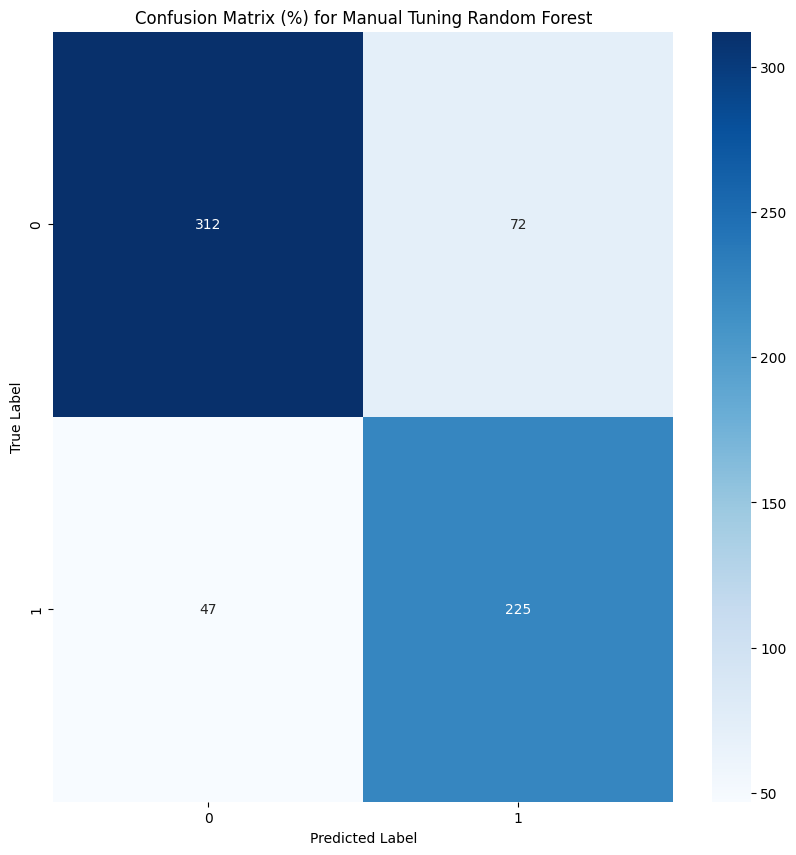

In [49]:
matrix3 = confusion_matrix(y_test_tree.argmax(axis=1), np.around(predictions3, decimals=0).argmax(axis=1))

#Plot
plt.figure(figsize = (10,10))
sns.heatmap(matrix3, annot=True, fmt='d', cmap='Blues', cbar=True,)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (%) for Manual Tuning Random Forest')
plt.show()

In [50]:
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# feature importances
feature_importances = model3.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the DataFrame
print(importance_df)

           Feature  Importance
4          Sulfate    0.303680
0               ph    0.208606
2           Solids    0.088042
3      Chloramines    0.080860
1         Hardness    0.078757
6   Organic_carbon    0.062659
8        Turbidity    0.060117
7  Trihalomethanes    0.058789
5     Conductivity    0.058490
